<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
لبه قطعه‌ها
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم تا با استفاده از لبه‌یابی، قطعه بندی را انجام دهیم. در ادامه با بخش های مختلف تمرین آشنا خواهیم شد.
</font>
</p>

In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تصویر زیر را بصورت خاکستری بخوانید.
<br>
Data/eagle.jpg
</font>
</p>

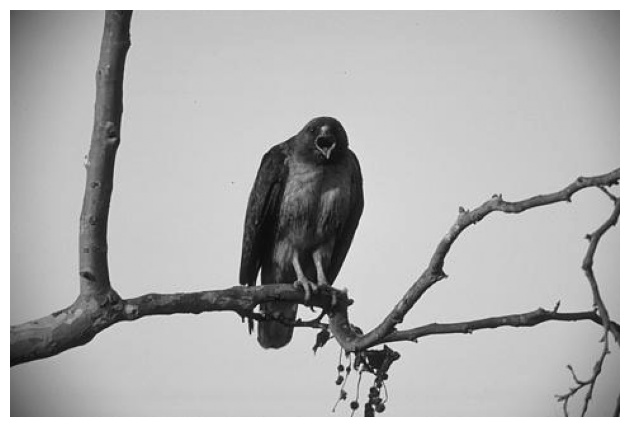

In [153]:
img = cv2.imread("./Data/eagle.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, "gray")
plt.axis("off")
plt.tight_layout()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: لبه‌یابی به عنوان پیش‌پردازش
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله روی تصویر یک فاز تیزسازی باید انجام دهید. به ازای یکی از فیلترهای معرفی شده این عملیات را انجام دهید. 
<br>
 حتما خروجی این بخش را نمایش دهید تا ببنید در اثر اعمال تیزسازی تصویر چگونه تغییر خواهد کرد.
</font>
</p>

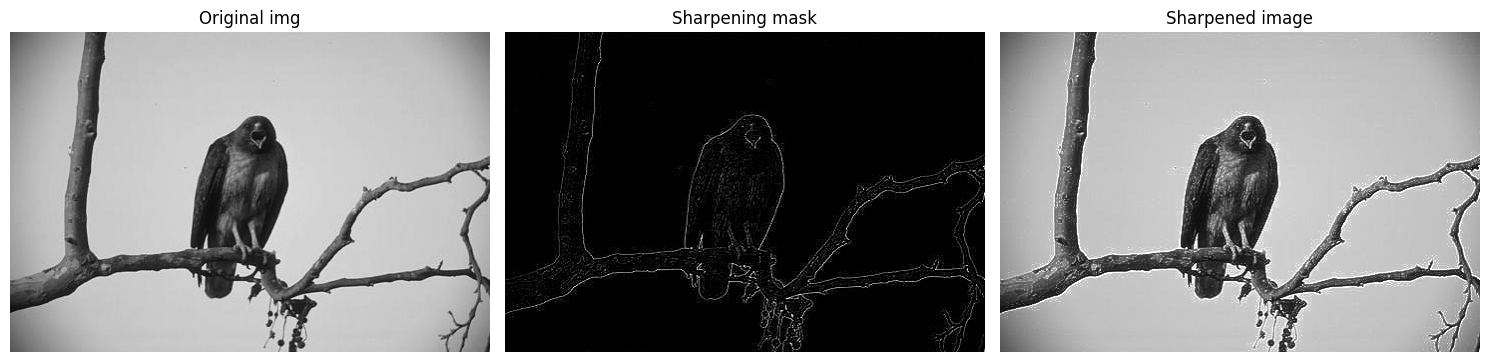

In [154]:
laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

sharp_mask = cv2.filter2D(img, -1, laplacian_kernel)

plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(img, "gray")
plt.axis("off")
plt.title("Original img")

plt.subplot(1, 3, 2)
plt.imshow(sharp_mask, "gray")
plt.axis("off")
plt.title("Sharpening mask")

sharpened = cv2.add(img,sharp_mask)

plt.subplot(1, 3, 3)
plt.imshow(sharpened, "gray")
plt.axis("off")
plt.title("Sharpened image")

plt.tight_layout()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: قطعه‌بندی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال بر روی تصویری که تیزسازی را بر روی آن انجام دادید باید قطعه‌بندی را انجام دهید.
</font>
</p>

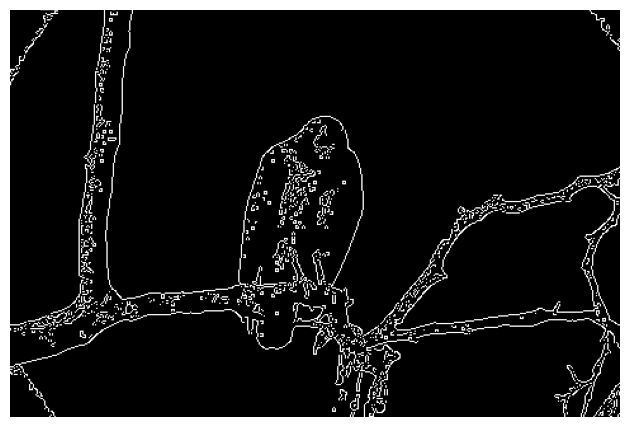

In [160]:
threshold1 = 50
threshold2 = 150

otsu_threshold, segmented_image = cv2.threshold(
    sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

image_edges = cv2.Canny(segmented_image, threshold1, threshold2)

contours, _ = cv2.findContours(image_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

segmented_image = np.zeros_like(sharpened)
cv2.drawContours(segmented_image, contours, -1,  255, 1)
_, segmented_image = cv2.threshold(segmented_image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(segmented_image, "gray")
plt.axis("off")
plt.tight_layout()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله چهارم: قطعه‌بندی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این مرحله باید قطعه‌بندی خود را نهایی کنید. 
    <br>
    دقت کنید که حتما تصویر قطعه‌بندی شده دارای پیش‌زمینه <b>سفید</b> باشد و قطعات شما با مرز <b>سیاه</b> از همدیگر جدا شده باشند.
</font>
</p>

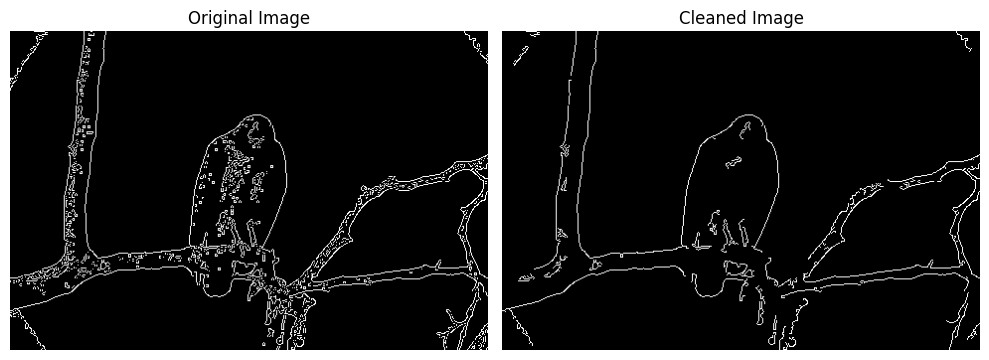

In [156]:
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

output = np.zeros_like(segmented_image)


for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    if area > 25:
        output[labels == i] = 255

_, output = cv2.threshold(output, 127, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(segmented_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output, cmap="gray")
plt.title("Cleaned Image")
plt.axis("off")

plt.tight_layout()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله پنجم: ذخیره‌سازی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله تصویر قطعه‌بندی شده نهایی را با فایلی به نام زیر ذخیره کنید:
    <br>
    segmented_eagle.jpg
</font>
</p>

In [157]:
cv2.imwrite(
    "segmented_eagle.jpg",
    cv2.cvtColor(cv2.bitwise_not(output), cv2.COLOR_GRAY2RGB),
)

True

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله پنجم: سلول جواب‌ساز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدون هیچگونه تغییری، این سلول را اجرا کنید تا فایل پاسخ شما آماده شود.
</font>
</p>

In [158]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "segmented_eagle.jpg"]
compress(file_names)

File Paths:
['notebook.ipynb', 'segmented_eagle.jpg']
